In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variable_names = [
    "tiene_mascota",
    "cantidad_mascotas",
    "tipo_mascota",
    "edad_gato",
    "raza_gato",
    "tamano_gato",
    "edad_perro",
    "raza_perro",
    "tamano_perro",
    "compra_juguete",
    "compra_juguete_ultimo_anio",
    "frecuencia_compra_juguetes",
    "tiempo_jugando_diario",
    "interactua_con_mascota",
    "tipo_juguetes_compra",
    "juguetes_favoritos",
    "mala_experiencia",
    "criterio_compra_juguetes",
    "factores_evaluar_calidad_juguetes",
    "factor_importante",
    "dispuesto_pagar_mejor_calidad",
    "calidad_media_juguetes",
    "diferencia_comportamiento",
    "precio_max_juguete",
    "forma_compra",
    "marca_preferida",
    "marca_preferida_nombre",
    "edad_encuestado",
    "unidad_familiar",
    "genero",
    "ocupacion_encuestado"
]

In [147]:
df = pd.read_csv('respuestas.csv')
df = df.drop('Marca temporal', axis=1) # Eliminar columna de marca temporal
df = df.drop('Puntuación', axis=1) # Eliminar columna de puntuación
df = df.rename(columns=dict(zip(df.columns, variable_names))) # Renombrar columnas
df.drop(df[df['tiene_mascota'] == 'No'].index, inplace=True) # Eliminar filas de personas que no tienen mascota

In [80]:
"""df['tipo_mascota'] = df['tipo_mascota'].map({'Perro': 0, 'Gato': 1}) # Convertir tipo de mascota a binario
df['compra_juguete'] = df['compra_juguete'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete a binario
df['compra_juguete_ultimo_anio'] = df['compra_juguete_ultimo_anio'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete en el último año a binario
df['interactua_con_mascota'] = df['interactua_con_mascota'].map({'Sí': 1, 'No': 0}) # Convertir interacción con mascota a binario
df['mala_experiencia'] = df['mala_experiencia'].map({'Sí': 1, 'No': 0}) # Convertir mala experiencia a binario
df['diferencia_comportamiento'] = df['diferencia_comportamiento'].map({'Sí': 1, 'No': 0}) # Convertir diferencia de comportamiento a binario
df['marca_preferida'] = df['marca_preferida'].map({'Sí': 1, 'No': 0}) # Convertir marca preferida a binario
df['genero'] = df['genero'].map({'Masculino': 'Masculino', 'Femenino': 'Femenino'}) # Convertir género a binario
"""


"df['tipo_mascota'] = df['tipo_mascota'].map({'Perro': 0, 'Gato': 1}) # Convertir tipo de mascota a binario\ndf['compra_juguete'] = df['compra_juguete'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete a binario\ndf['compra_juguete_ultimo_anio'] = df['compra_juguete_ultimo_anio'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete en el último año a binario\ndf['interactua_con_mascota'] = df['interactua_con_mascota'].map({'Sí': 1, 'No': 0}) # Convertir interacción con mascota a binario\ndf['mala_experiencia'] = df['mala_experiencia'].map({'Sí': 1, 'No': 0}) # Convertir mala experiencia a binario\ndf['diferencia_comportamiento'] = df['diferencia_comportamiento'].map({'Sí': 1, 'No': 0}) # Convertir diferencia de comportamiento a binario\ndf['marca_preferida'] = df['marca_preferida'].map({'Sí': 1, 'No': 0}) # Convertir marca preferida a binario\ndf['genero'] = df['genero'].map({'Masculino': 'Masculino', 'Femenino': 'Femenino'}) # Convertir género a binario\n"

Varianza: 1.598176718092566
Media: 1.5483870967741935
Mediana: 1.0
Moda: 0    1.0
Name: cantidad_mascotas, dtype: float64


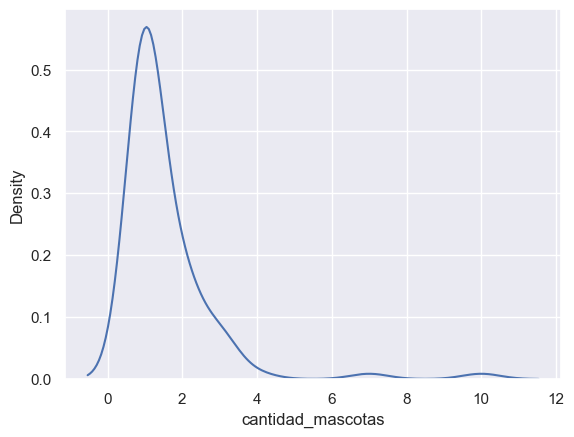

In [113]:
sns.kdeplot(
    data=df,
    x='cantidad_mascotas'
)

print('Varianza:', df['cantidad_mascotas'].var())
print('Media:',pd.Series.mean(df['cantidad_mascotas']))
print('Mediana:',pd.Series.median(df['cantidad_mascotas']))
print('Moda:',pd.Series.mode(df['cantidad_mascotas']))

Porcentaje de personas que tienen perro: 76.34408602150538


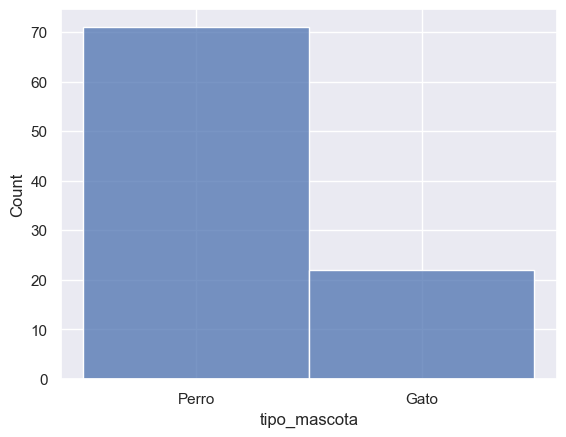

In [82]:
sns.histplot(
    data=df,
    x='tipo_mascota'
)

#porcentaje de personas que tienen perro
print('Porcentaje de personas que tienen perro:', df['tipo_mascota'].value_counts(normalize=True)[0]*100)

Frecuencia de cada categoria: Prime (3 a 6 años)           36.0
Mature (7 a 10 años)         24.0
Junior (6 meses a 2 años)    24.0
Senior (11 a 14 años)         4.0
Name: edad_gato, dtype: float64


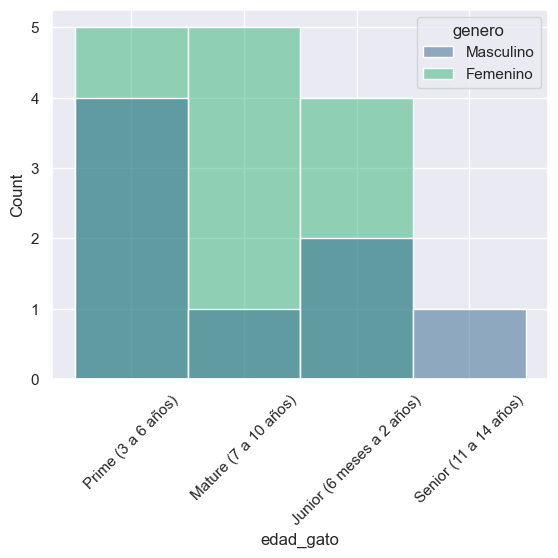

In [115]:
sns.histplot(
    data=df,
    x='edad_gato',
    hue='genero',
    palette='viridis'    
)
plt.xticks(rotation=45)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['edad_gato'].value_counts()/25)*100)

Frecuencia de cada categoria: Medio      44.0
Grande     28.0
Pequeño    16.0
Name: tamano_gato, dtype: float64


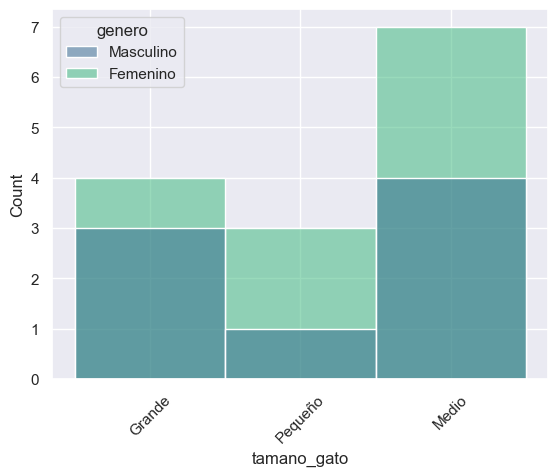

In [84]:
sns.histplot(
    data=df,
    x='tamano_gato',
    hue='genero',
    palette='viridis'
)
plt.xticks(rotation=45)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['tamano_gato'].value_counts()/25)*100)

Frecuencia de cada categoria: Prime (3 a 6 años)           36.0
Mature (7 a 10 años)         24.0
Junior (6 meses a 2 años)    24.0
Senior (11 a 14 años)         4.0
Name: edad_gato, dtype: float64


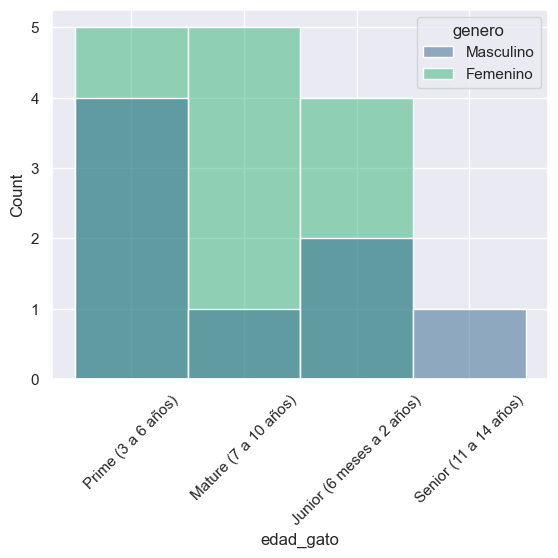

In [85]:
sns.histplot(
    data=df,
    x='edad_gato',
    hue='genero',
    palette='viridis'
)
plt.xticks(rotation=45)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['edad_gato'].value_counts()/25)*100)

Frecuencia de cada categoria: Europeo     40.0
Siamés      12.0
Persa        8.0
NS/NC        8.0
Himalayo     4.0
Exótico      4.0
Esfinge      4.0
Esfinge      4.0
Exotico      4.0
Name: raza_gato, dtype: float64


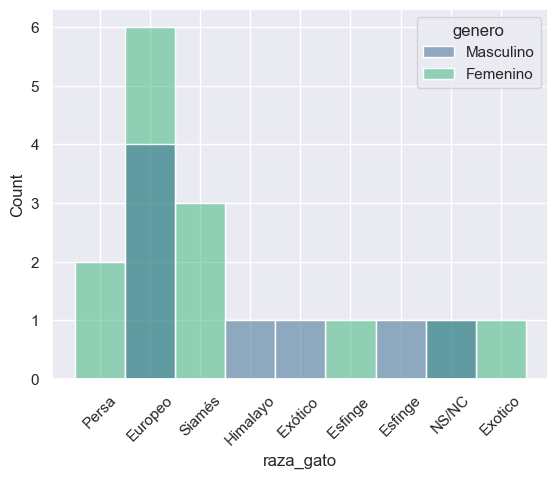

In [86]:
sns.histplot(
    data=df,
    x='raza_gato',
    hue='genero',
    palette='viridis'
)
plt.xticks(rotation=45)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['raza_gato'].value_counts()/25)*100)

Frecuencia de cada categoria: Joven       40.845070
Adulto      39.436620
Senior      16.901408
Cachorro     2.816901
Name: edad_perro, dtype: float64


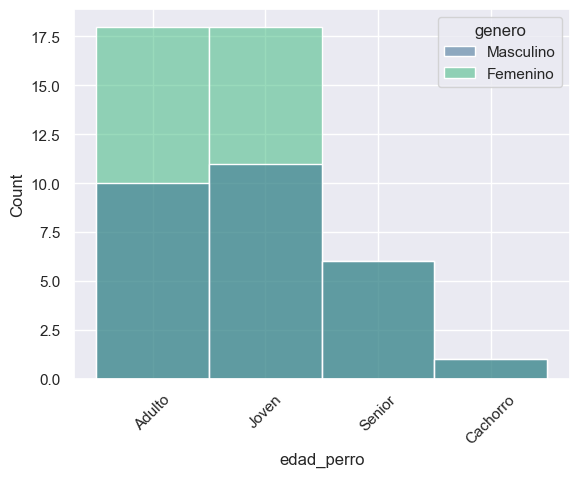

In [87]:
sns.histplot(
    data=df,
    x='edad_perro',
    hue='genero',
    palette='viridis'
)
plt.xticks(rotation=45)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['edad_perro'].value_counts()/df['raza_perro'].count())*100)

Frecuencia de cada categoria: Cruce entre razas            25.352113
Bichón Maltés                15.492958
Border Collie                 9.859155
Pastor Alemán                 7.042254
Labrador                      2.816901
Mastín español                2.816901
Yorkshire                     2.816901
Perro de Aguas                1.408451
boyero de berna               1.408451
Caniche                       1.408451
Villano de carranza           1.408451
West Highland                 1.408451
Cocker Spaniel                1.408451
Cotton de tule se             1.408451
Cocker Spaniel Inglés         1.408451
Golden Retriever              1.408451
Mastín                        1.408451
Caniche                       1.408451
Sabueso de Baviera            1.408451
York shire                    1.408451
Cocker Spaniel                1.408451
Papillon y Setter ingles      1.408451
bodeguero andaluz RBA         1.408451
Pastor Belga                  1.408451
Yorkie                        1.40

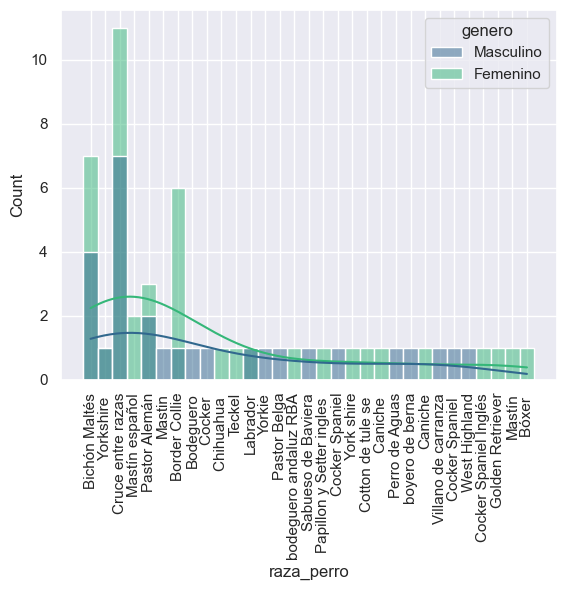

In [88]:
sns.histplot(
    data=df,
    x='raza_perro',
    hue='genero',
    palette='viridis',
    kde=True
)
plt.xticks(rotation=90)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['raza_perro'].value_counts()/df['raza_perro'].count())*100)

Frecuencia de cada categoria: 11-25 Kilos    35.211268
0-10 Kilos     33.802817
26-50 Kilos    25.352113
50+ Kilos       5.633803
Name: tamano_perro, dtype: float64


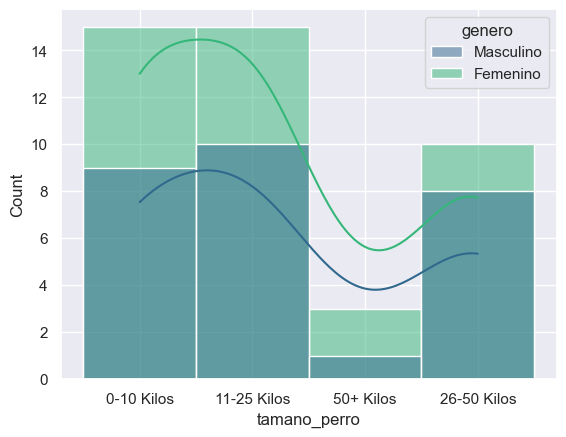

In [89]:
sns.histplot(
    data=df,
    x='tamano_perro',
    hue='genero',
    palette='viridis',
    kde=True
)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['tamano_perro'].value_counts()/df['tamano_perro'].count())*100)

Porcentaje de personas que compran juguetes: 94.6236559139785 %


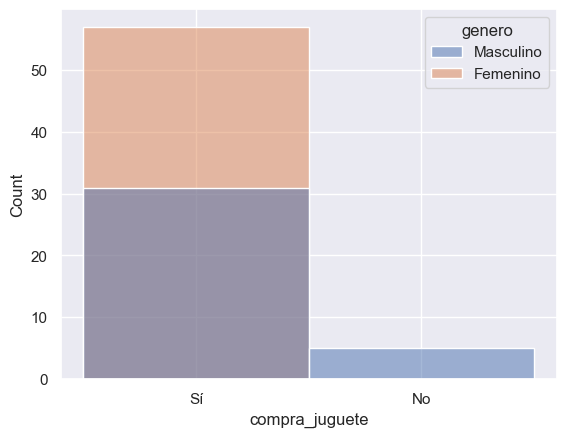

In [90]:
sns.histplot(
    data=df,
    x='compra_juguete',
    hue='genero'
)

#porcentaje de personas que compran juguetes
print('Porcentaje de personas que compran juguetes:', df['compra_juguete'].value_counts(normalize=True)[0]*100, '%')

Porcentaje de personas que han comprado juguetes en el último año: 64.51612903225806 %


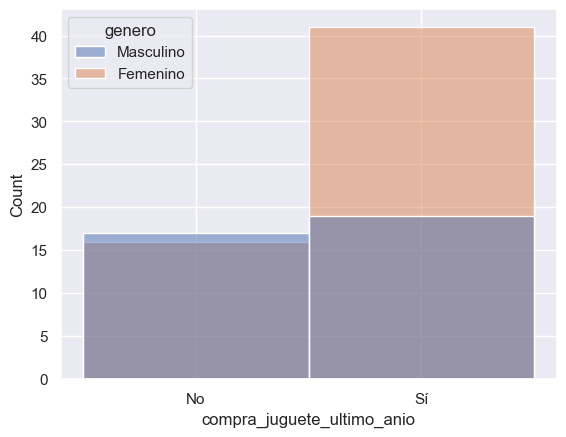

In [91]:
sns.histplot(
    data=df,
    x='compra_juguete_ultimo_anio',
    hue='genero'
)

#porcentaje de personas que compran juguetes
print('Porcentaje de personas que han comprado juguetes en el último año:', df['compra_juguete_ultimo_anio'].value_counts(normalize=True)[0]*100, '%')

Frecuencia de cada categoria: Menos de una vez al año    30.107527
Una vez cada 6 meses       26.881720
Una vez al año             22.580645
Una vez al mes              9.677419
Nunca                       8.602151
Más de una vez al mes       2.150538
Name: frecuencia_compra_juguetes, dtype: float64


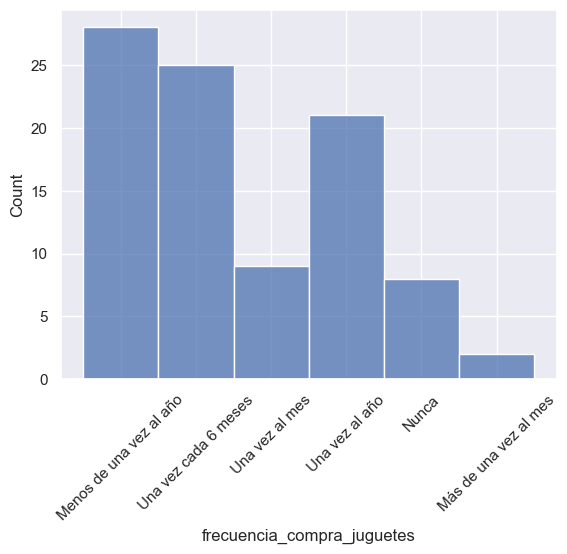

In [117]:
sns.histplot(
    data=df,
    x='frecuencia_compra_juguetes'
)
plt.xticks(rotation=45)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['frecuencia_compra_juguetes'].value_counts()/df['frecuencia_compra_juguetes'].count())*100)

Frecuencia de cada categoria: 00:00:00    23.655914
00:30:00    11.827957
01:00:00    11.827957
02:00:00    10.752688
00:20:00     6.451613
00:05:00     6.451613
03:00:00     5.376344
00:10:00     4.301075
05:00:00     4.301075
04:00:00     4.301075
01:30:00     3.225806
00:40:00     2.150538
00:15:00     2.150538
00:12:00     1.075269
00:01:00     1.075269
00:03:00     1.075269
Name: tiempo_jugando_diario, dtype: float64


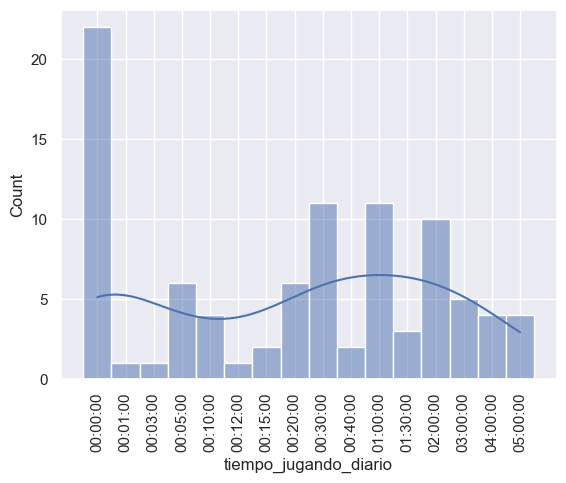

In [93]:
df['tiempo_jugando_diario'] = pd.to_datetime(df['tiempo_jugando_diario']).dt.strftime('%H:%M:%S')
aux = df.sort_values('tiempo_jugando_diario')
sns.histplot(
    data=aux,
    x='tiempo_jugando_diario',
    kde=True
)
plt.xticks(rotation=90)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['tiempo_jugando_diario'].value_counts()/df['tiempo_jugando_diario'].count())*100)

Porcentaje de personas que interactuan con su mascota: 88.17204301075269 %


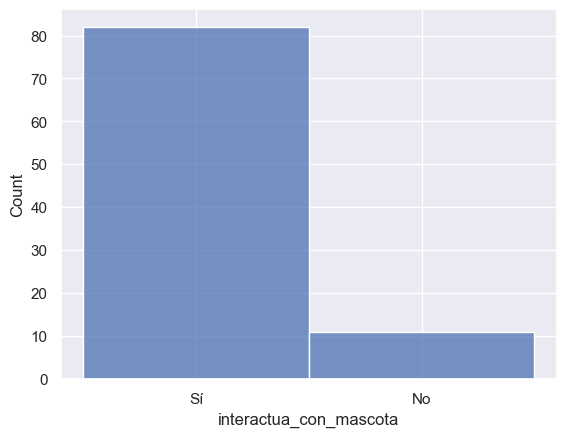

In [94]:
sns.histplot(
    data=df,
    x='interactua_con_mascota'
)
#porcentaje de personas que interactuan con su mascota
print('Porcentaje de personas que interactuan con su mascota:', df['interactua_con_mascota'].value_counts(normalize=True)[0]*100, '%')

Frecuencia de cada categoria:  Juguetes de cuerda       20.320856
Juguetes de goma          19.251337
Juguetes de peluche       13.368984
 Juguetes con sonido      13.368984
Juguetes de cuerda         8.021390
 Juguetes de goma          7.486631
 Juguetes interactivos     6.417112
Juguetes con sonido        5.347594
Juguetes interactivos      1.069519
Ninguno                    1.069519
 Pelotas                   1.069519
 Pelotas de tenis          1.069519
Nada                       0.534759
                           0.534759
Comestibles                0.534759
Un palo                    0.534759
Name: tipo_juguetes_compra, dtype: float64
    tipo_juguetes_compra
0    Juguetes de peluche
1    Juguetes de peluche
2    Juguetes de peluche
3    Juguetes de peluche
4    Juguetes de peluche
..                   ...
182                     
183     Pelotas de tenis
184     Pelotas de tenis
185         Comestibles 
186              Un palo

[187 rows x 1 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Juguetes de peluche'),
  Text(1, 0, ' Juguetes de goma'),
  Text(2, 0, ' Juguetes de cuerda'),
  Text(3, 0, 'Juguetes interactivos'),
  Text(4, 0, 'Juguetes de goma'),
  Text(5, 0, ' Juguetes con sonido'),
  Text(6, 0, ' Juguetes interactivos'),
  Text(7, 0, 'Juguetes de cuerda'),
  Text(8, 0, 'Juguetes con sonido'),
  Text(9, 0, 'Ninguno'),
  Text(10, 0, ' Pelotas'),
  Text(11, 0, 'Nada'),
  Text(12, 0, ' '),
  Text(13, 0, ' Pelotas de tenis'),
  Text(14, 0, 'Comestibles '),
  Text(15, 0, 'Un palo')])

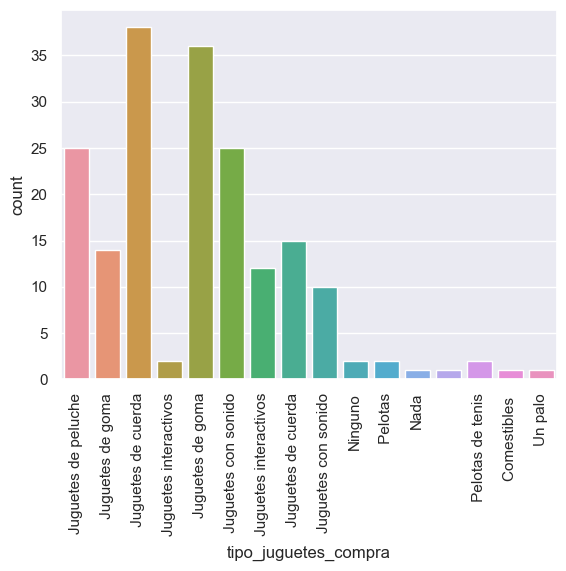

In [95]:
labels = {}
for x in df['tipo_juguetes_compra']:
    aux = x.split(',')
    for y in aux:
        if y in labels:
            labels[y] += 1
        else:
            labels[y] = 1

aux = []
for x in labels:
    for y in range(labels[x]):
        aux.append(x)

labels = pd.DataFrame(aux, columns=['tipo_juguetes_compra'])
print('Frecuencia de cada categoria:', (labels['tipo_juguetes_compra'].value_counts()/labels['tipo_juguetes_compra'].count())*100)
print(labels)
sns.countplot(
    data=labels,
    x='tipo_juguetes_compra'
)
plt.xticks(rotation=90)


Frecuencia de cada categoria: Juguetes de cuerda       31.182796
Juguetes de goma         22.580645
Juguetes con sonido      18.279570
Juguetes de peluche      15.053763
Juguetes interactivos     5.376344
Ninguno                   3.225806
Pelotas                   2.150538
Pelotas de tenis          1.075269
Un palo                   1.075269
Name: juguetes_favoritos, dtype: float64


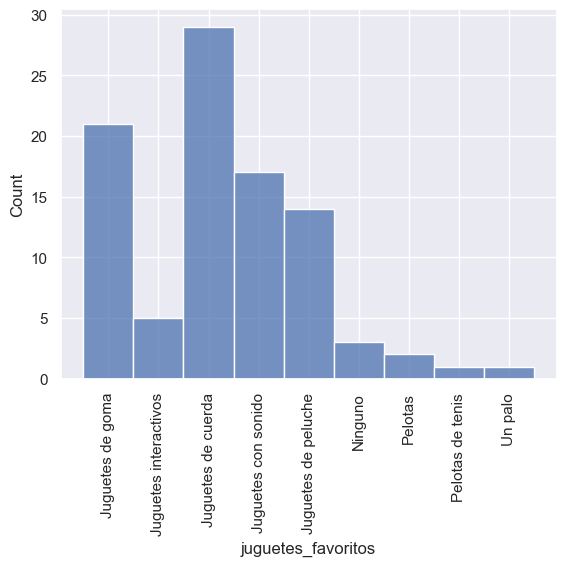

In [96]:
sns.histplot(
    data=df,
    x='juguetes_favoritos'
)
plt.xticks(rotation=90)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['juguetes_favoritos'].value_counts()/df['juguetes_favoritos'].count())*100)

Porcentaje de personas que han tenido una mala experiencia: 66.66666666666666 %


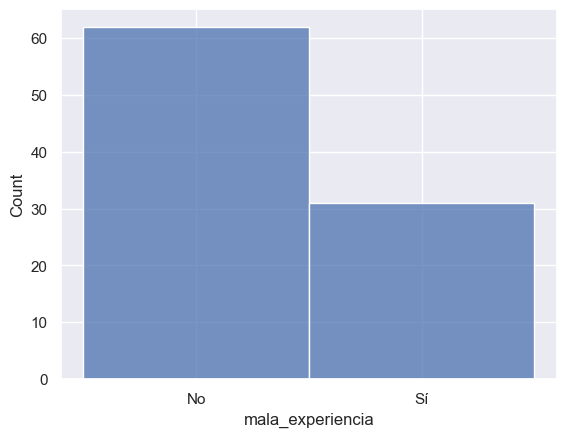

In [97]:
sns.histplot(
    data=df,
    x='mala_experiencia'
)
#porcentaje de personas que han tenido una mala experiencia
print('Porcentaje de personas que han tenido una mala experiencia:', df['mala_experiencia'].value_counts(normalize=True)[0]*100, '%')

Frecuencia de cada categoria: Lo que le guste a mi mascota                                59.139785
Calidad                                                     21.505376
Precio                                                      11.827957
Recomendaciones                                              4.301075
Seguridad para mi mascota (no peligrosos como tragables)     1.075269
No compro                                                    1.075269
Durabilidad                                                  1.075269
Name: criterio_compra_juguetes, dtype: float64


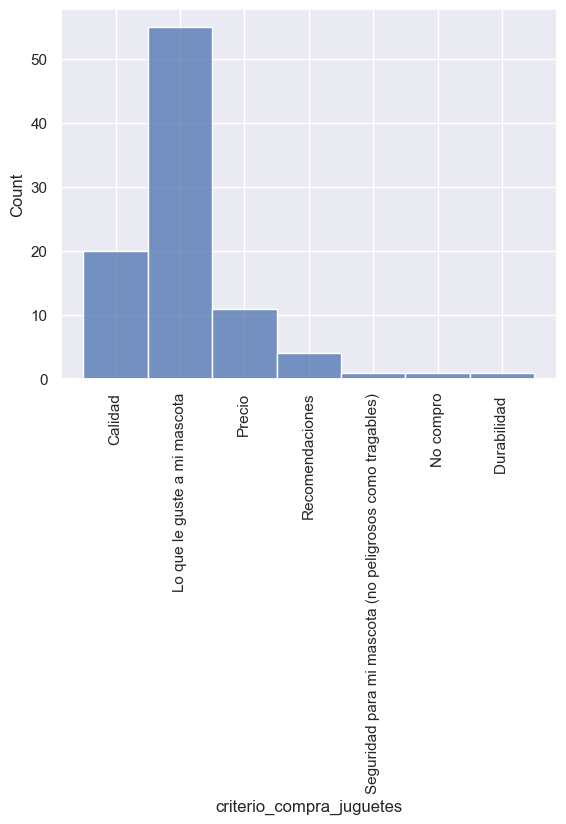

In [98]:
sns.histplot(
    data=df,
    x='criterio_compra_juguetes'
)
plt.xticks(rotation=90)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['criterio_compra_juguetes'].value_counts()/df['criterio_compra_juguetes'].count())*100)

Frecuencia de cada categoria: Seguridad                    23.170732
Diversión/entretenimiento    21.544715
Durabilidad                  20.325203
Precio                       15.853659
Tamaño                       10.975610
Interactividad                7.723577
No compro                     0.406504
Name: factores_evaluar_calidad_juguetes, dtype: float64
    factores_evaluar_calidad_juguetes
0                         Durabilidad
1                         Durabilidad
2                         Durabilidad
3                         Durabilidad
4                         Durabilidad
..                                ...
241                            Tamaño
242                            Tamaño
243                            Tamaño
244                            Tamaño
245                         No compro

[246 rows x 1 columns]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Durabilidad'),
  Text(1, 0, 'Seguridad'),
  Text(2, 0, 'Precio'),
  Text(3, 0, 'Diversión/entretenimiento'),
  Text(4, 0, 'Interactividad'),
  Text(5, 0, 'Tamaño'),
  Text(6, 0, 'No compro')])

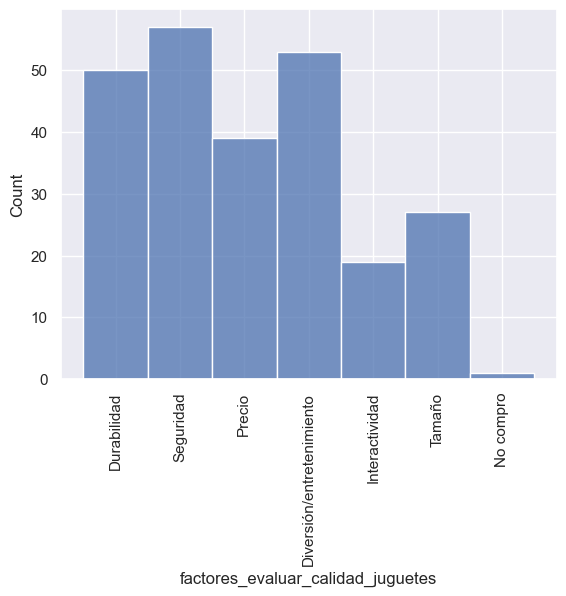

In [118]:
labels = {}
for x in df['factores_evaluar_calidad_juguetes']:
    aux = x.split(',')
    for y in aux:
        y = y.strip()
        if y in labels:
            labels[y] += 1
        else:
            labels[y] = 1

aux = []
for x in labels:
    for y in range(labels[x]):
        aux.append(x)

labels = pd.DataFrame(aux, columns=['factores_evaluar_calidad_juguetes'])
print('Frecuencia de cada categoria:', (labels['factores_evaluar_calidad_juguetes'].value_counts()/labels['factores_evaluar_calidad_juguetes'].count())*100)
print(labels)
sns.histplot(
    data=labels,
    x='factores_evaluar_calidad_juguetes'
)
plt.xticks(rotation=90)

Frecuencia de cada categoria: Seguridad                    47.311828
Diversión/entretenimiento    23.655914
Durabilidad                  16.129032
Precio                        6.451613
Interactividad                3.225806
Tamaño                        3.225806
Name: factor_importante, dtype: float64


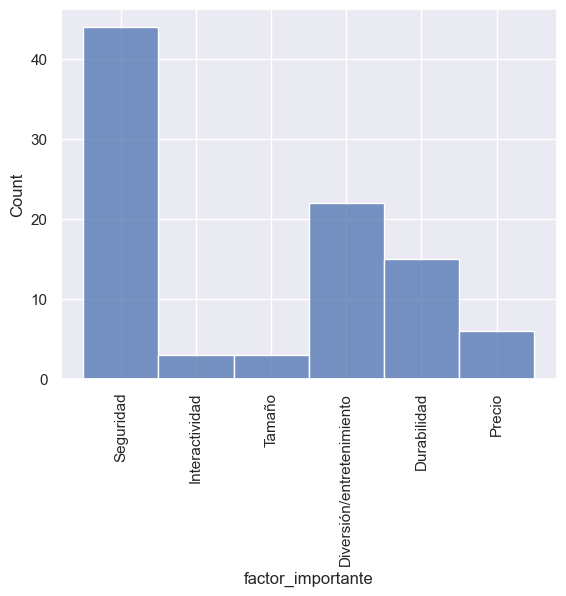

In [100]:
sns.histplot(
    data=df,
    x='factor_importante'
)
plt.xticks(rotation=90)
#frecuencia de cada categoria en porcentaje
print('Frecuencia de cada categoria:', (df['factor_importante'].value_counts()/df['factor_importante'].count())*100)

Número de personas que están dispuestas a pagar por mejor calidad: Depende del precio    58
Si                    30
No                     5
Name: dispuesto_pagar_mejor_calidad, dtype: int64
Porcentaje de personas que están dispuestas a pagar por mejor calidad: Depende del precio    62.365591
Si                    32.258065
No                     5.376344
Name: dispuesto_pagar_mejor_calidad, dtype: float64 %


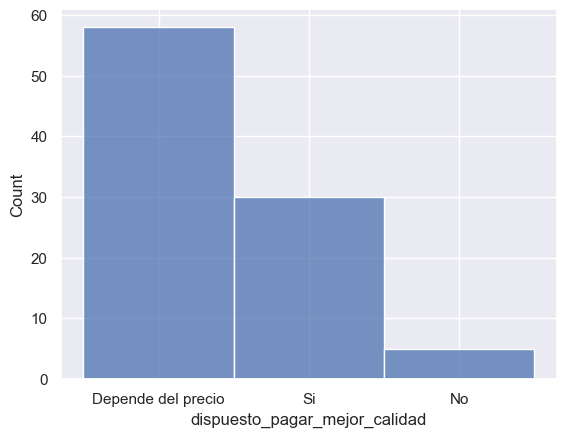

In [101]:
sns.histplot(
    data=df,
    x='dispuesto_pagar_mejor_calidad'
)
#numero de personas que están dispuestas a pagar por mejor calidad
print('Número de personas que están dispuestas a pagar por mejor calidad:', df['dispuesto_pagar_mejor_calidad'].value_counts())
#porcentaje de personas que están dispuestas a pagar por mejor calidad
print('Porcentaje de personas que están dispuestas a pagar por mejor calidad:', (df['dispuesto_pagar_mejor_calidad'].value_counts()/df['dispuesto_pagar_mejor_calidad'].count())*100, '%')

Porcentaje de personas por categoría: Calidad media    68.817204
Buena calidad    24.731183
Mala calidad      5.376344
Defectuoso        1.075269
Name: calidad_media_juguetes, dtype: float64 %


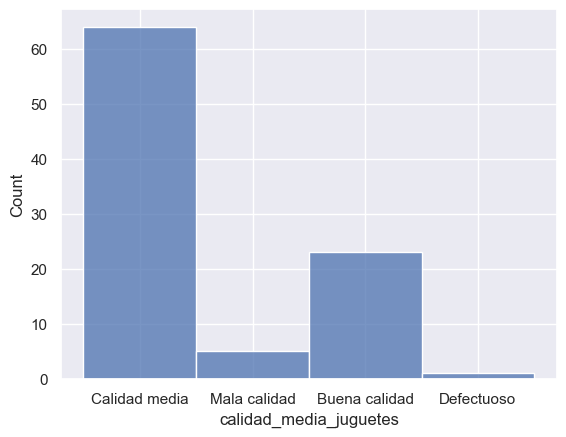

In [102]:
sns.histplot(
    data=df,
    x='calidad_media_juguetes',
)
#porcentaje de personas por categoría
print('Porcentaje de personas por categoría:', (df['calidad_media_juguetes'].value_counts()/df['calidad_media_juguetes'].count())*100, '%')

Porcentaje de personas por categoría: No    86.021505
Sí    13.978495
Name: diferencia_comportamiento, dtype: float64 %


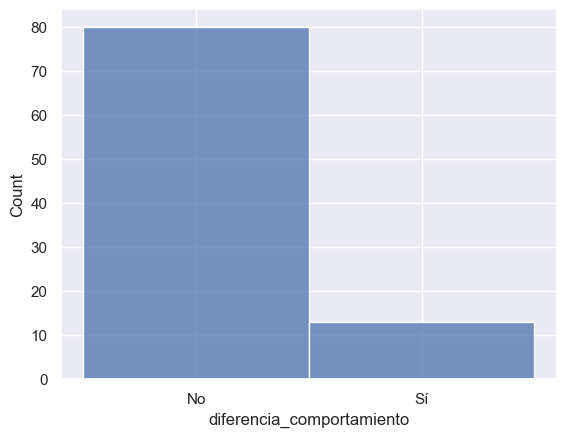

In [103]:
sns.histplot(
    data=df,
    x='diferencia_comportamiento',
)
#porcentaje de personas por categoría
print('Porcentaje de personas por categoría:', (df['diferencia_comportamiento'].value_counts()/df['diferencia_comportamiento'].count())*100, '%')

C:\Users\fabri\AppData\Local\Temp\ipykernel_2428\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

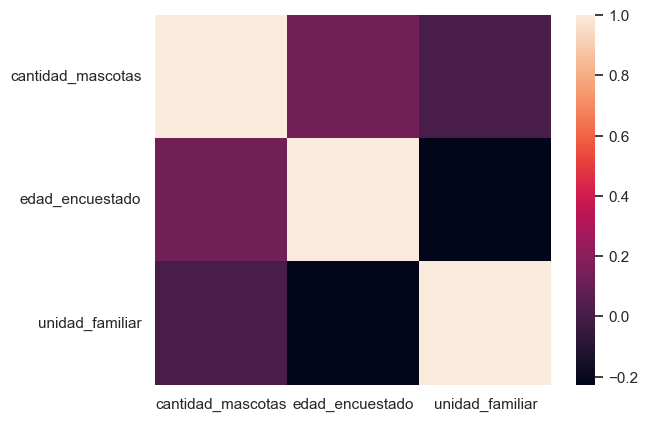

In [104]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='edad_encuestado', ylabel='Count'>

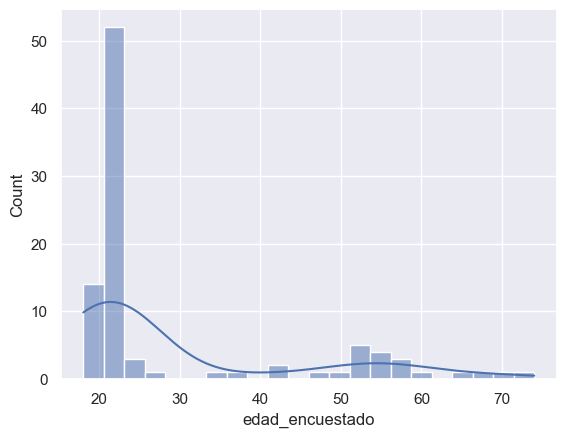

In [105]:
sns.histplot(df, x="edad_encuestado",kde=True)

<AxesSubplot: >

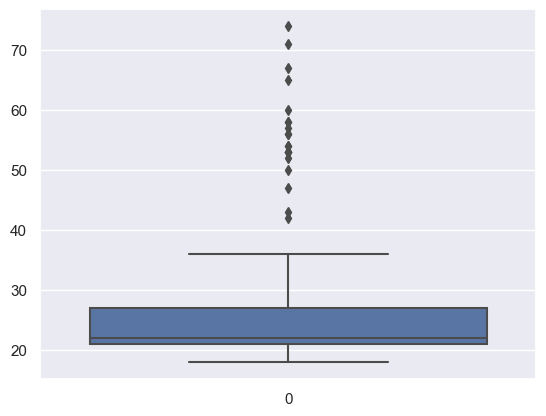

In [106]:
sns.boxplot(data=df['edad_encuestado'])

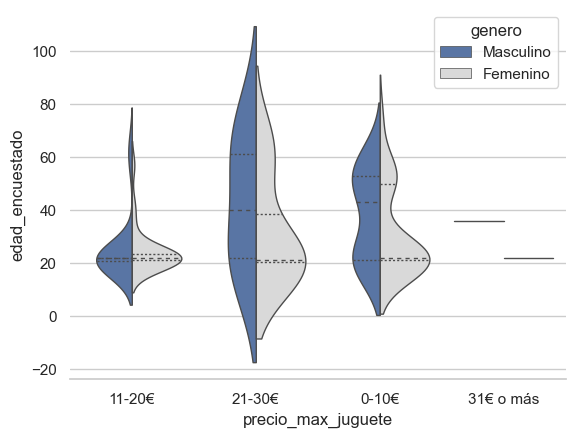

In [107]:
sns.set_theme(style="whitegrid")
sns.violinplot(
    data=df,
    x='precio_max_juguete',
    y='edad_encuestado',
    hue='genero',
    split=True,
    inner="quart",
    linewidth=1,
    palette={"Masculino": "b", "Femenino": ".85"}
)
sns.despine(left=True)

<AxesSubplot: xlabel='precio_max_juguete', ylabel='Count'>

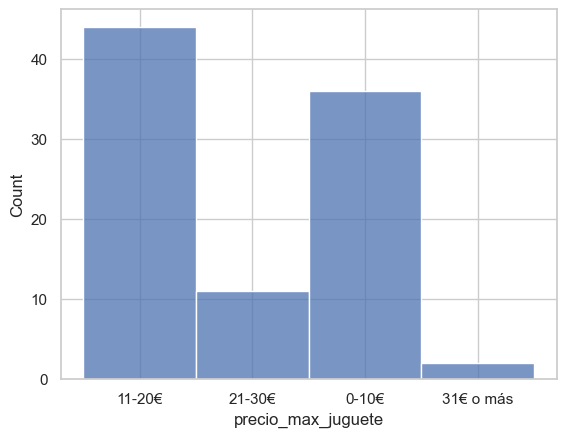

In [108]:
sns.histplot(
    data=df,
    x="precio_max_juguete"
)

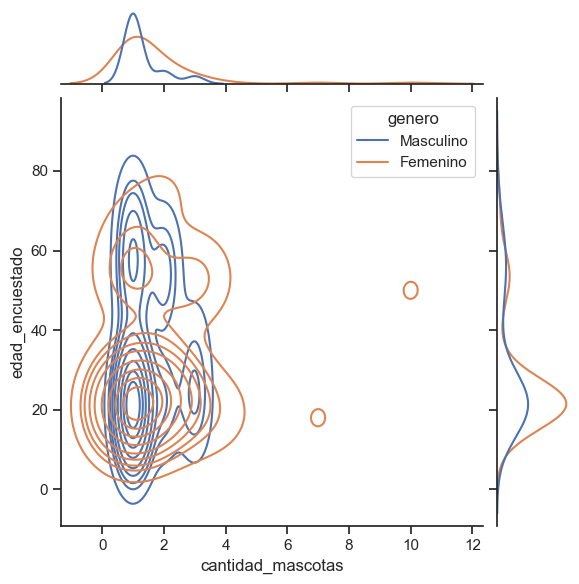

In [109]:
sns.set_theme(style="ticks")
sns.jointplot(data=df,
              x='cantidad_mascotas',
              y='edad_encuestado',
              hue='genero',
              kind='kde'
)

KeyboardInterrupt: 

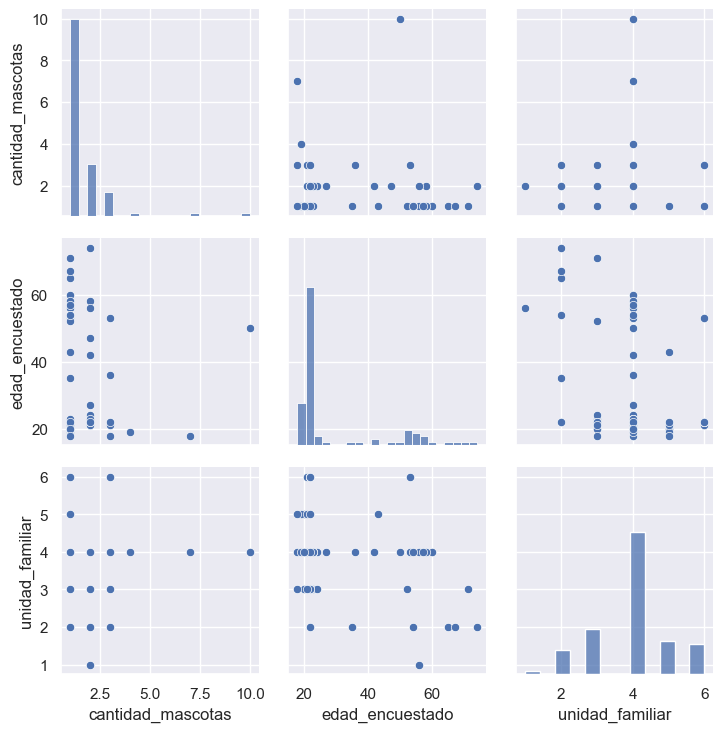

In [110]:
sns.set_theme(style="darkgrid")
sns.pairplot(df)

ValueError: could not convert string to float: 'Sí'

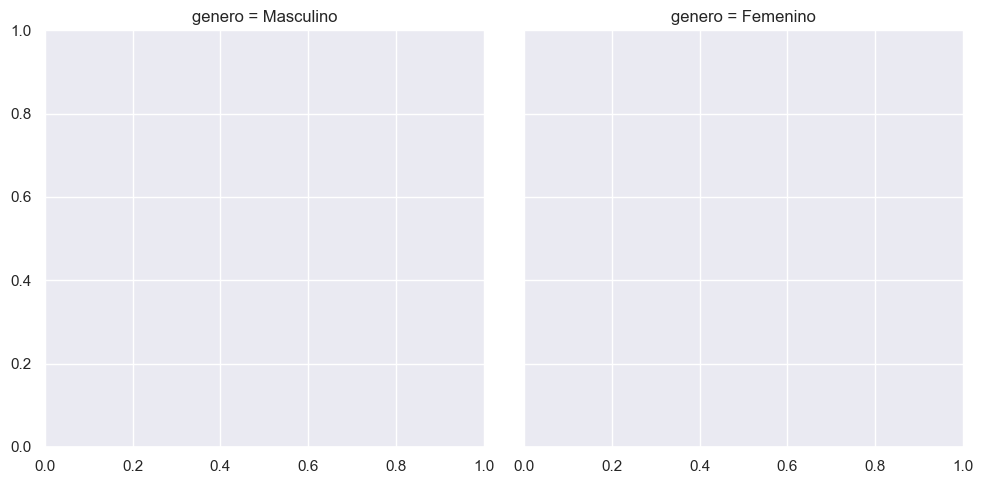

In [ ]:
sns.set_theme(style="darkgrid")
sns.lmplot(
    data=df,
    x='edad_encuestado',
    y='interactua_con_mascota',
    col='genero',
    palette=dict(male="#6495ED", female="#F08080"),
    y_jitter=.04,
    logistic=True
)

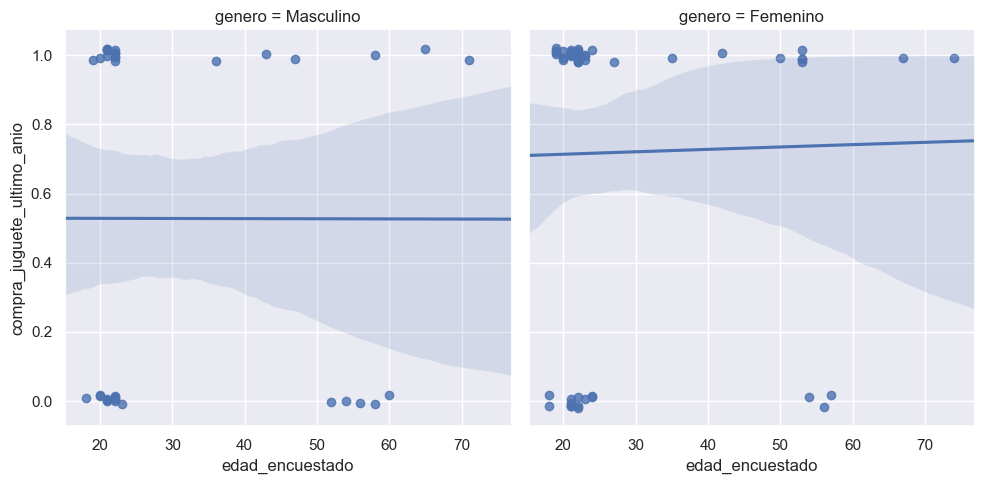

In [ ]:

sns.lmplot(
    data=df,
    x='edad_encuestado',
    y='compra_juguete_ultimo_anio',
    col='genero',
    palette=dict(male="#6495ED", female="#F08080"),
    y_jitter=.02,
    logistic=True,
    truncate=False
)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Seguridad'),
  Text(1, 0, 'Diversión/entretenimiento'),
  Text(2, 0, 'Durabilidad'),
  Text(3, 0, 'Precio'),
  Text(4, 0, 'Interactividad'),
  Text(5, 0, 'Tamaño'),
  Text(6, 0, 'No')])

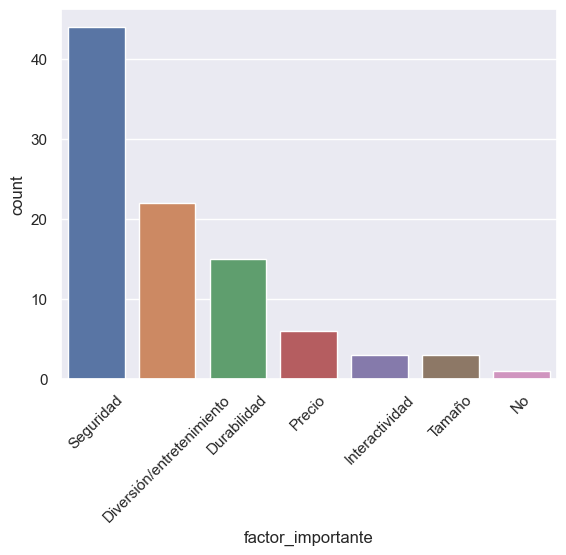

In [ ]:
sns.countplot(data=df, x='factor_importante',order=df['factor_importante'].value_counts().index)
plt.xticks(rotation=45)

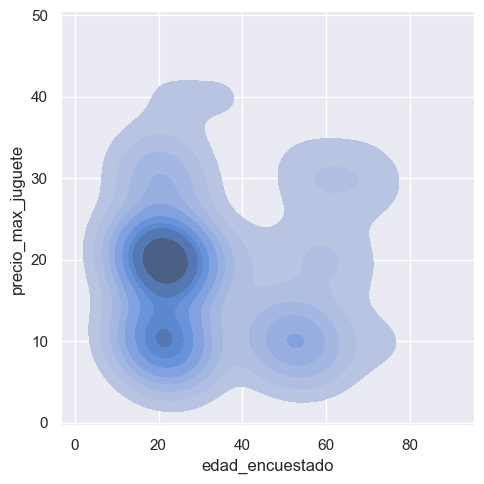

In [ ]:
df['precio_max_juguete'] = df['precio_max_juguete'].map({'0-10€': 10, '11-20€': 20, '21-30€': 30, '31€ o más': 40}) # Convertir precio máximo de juguete a binario
sns.displot(
    data=df,
    x="edad_encuestado",
    y="precio_max_juguete",
    kind='kde',
    fill=True
)

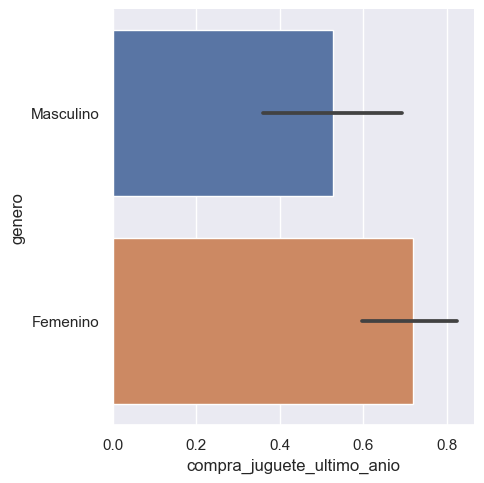

In [ ]:
sns.catplot(
    data=df,
    x='compra_juguete_ultimo_anio',
    y='genero',
    kind='bar'
)

<AxesSubplot: xlabel='genero', ylabel='Count'>

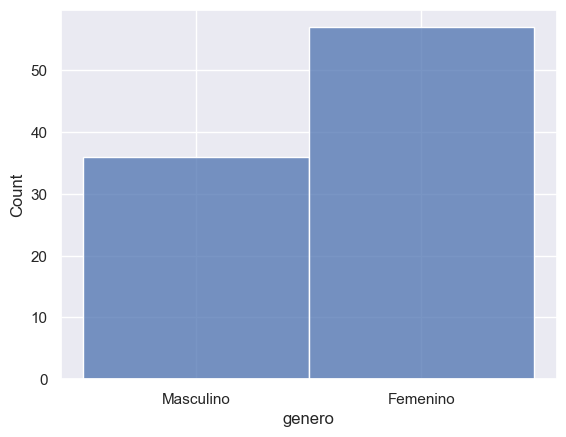

In [ ]:
sns.histplot(
    data=df,
    x="genero"
)

<AxesSubplot: xlabel='compra_juguete_ultimo_anio', ylabel='Count'>

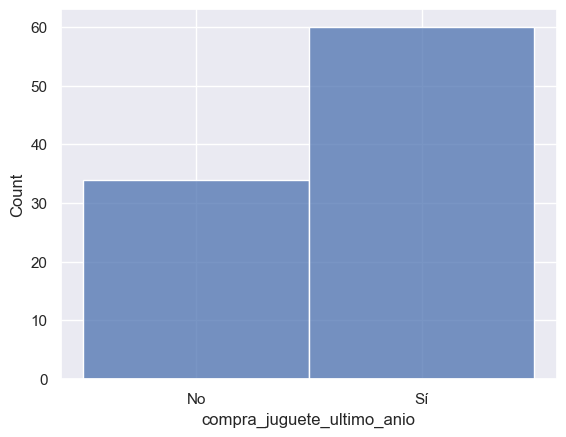

In [ ]:
#map 0s and 1s to yes and no
df['compra_juguete_ultimo_anio'] = df['compra_juguete_ultimo_anio'].map({0: 'No', 1: 'Sí'})

sns.histplot(
    data=df,
    x="compra_juguete_ultimo_anio"
)

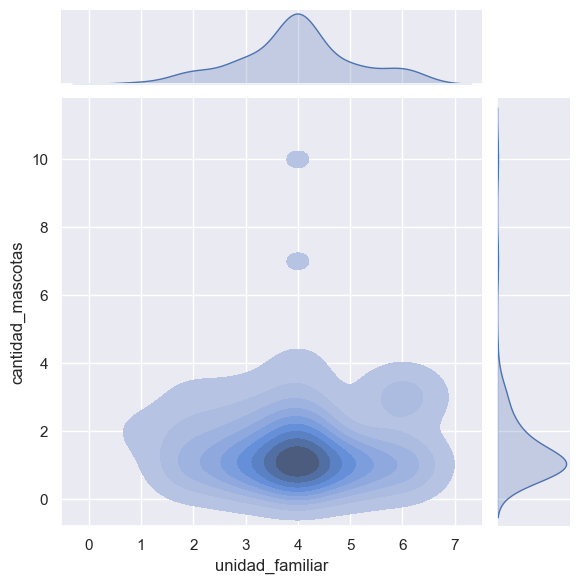

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
g = sns.jointplot(data=df, y="cantidad_mascotas", x="unidad_familiar", color='b', kind="kde", fill=True)

In [ ]:
df['frecuencia_compra_juguetes']

0      Menos de una vez al año
1      Menos de una vez al año
3         Una vez cada 6 meses
4               Una vez al mes
6         Una vez cada 6 meses
                ...           
118       Una vez cada 6 meses
119      Más de una vez al mes
120      Más de una vez al mes
121                      Nunca
122                      Nunca
Name: frecuencia_compra_juguetes, Length: 93, dtype: object

In [148]:


df['interactua_con_mascota'] = df['interactua_con_mascota'].map({'Sí': 1, 'No': 0})
juegaConMascota = df[df['interactua_con_mascota'] == 1]
noJuegaConMascota = df[df['interactua_con_mascota'] == 0]



Frecuencia de cada categoria: 11-20€       47.311828
0-10€        38.709677
21-30€       11.827957
31€ o más     2.150538
Name: precio_max_juguete, dtype: float64


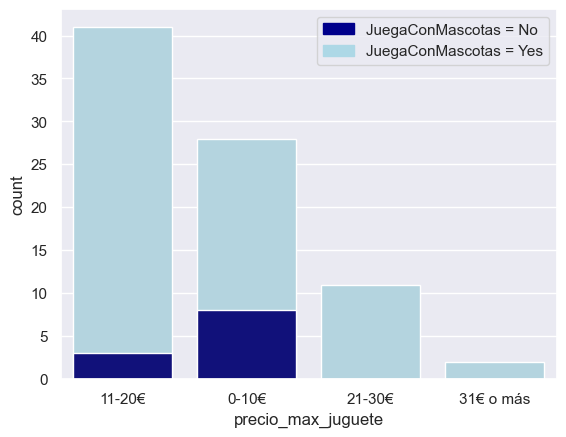

In [151]:


sns.countplot(data=df[df['interactua_con_mascota'] == 1], color='lightblue', x="precio_max_juguete",  order=juegaConMascota['precio_max_juguete'].value_counts().index)
sns.countplot(data=df[df['interactua_con_mascota'] == 0], color='darkblue', x="precio_max_juguete", order=juegaConMascota['precio_max_juguete'].value_counts().index)
print('Frecuencia de cada categoria:', (df['precio_max_juguete'].value_counts()/df['precio_max_juguete'].count())*100)



top_bar = mpatches.Patch(color='darkblue', label='JuegaConMascotas = No')
bottom_bar = mpatches.Patch(color='lightblue', label='JuegaConMascotas = Yes')
plt.legend(handles=[top_bar, bottom_bar])


In [125]:


total = df.groupby('precio_max_juguete')[['compra_juguete']].count().reset_index()
display(df['precio_max_juguete'])
CompraJuegaConMascotas = juegaConMascota.groupby('precio_max_juguete')[['compra_juguete']].count().reset_index()
CompraNoJuegaConMascotas = noJuegaConMascota.groupby('precio_max_juguete')[['compra_juguete']].count().reset_index()
display(CompraJuegaConMascotas)
display(CompraNoJuegaConMascotas)
new_row = {'precio_max_juguete': ' 21-30€', 'compra_juguete': 0}
CompraNoJuegaConMascotas.loc['21-30€'] = new_row
new_row = {'precio_max_juguete': '31€ o más', 'compra_juguete': 0}
CompraNoJuegaConMascotas.loc['31€ o más'] = new_row


CompraJuegaConMascotas['compra_juguete'] = [i / j * 100 for i,j in zip(CompraJuegaConMascotas['compra_juguete'], total['compra_juguete'])]
CompraNoJuegaConMascotas['compra_juguete'] = [i / j * 100 for i,j in zip(CompraNoJuegaConMascotas['compra_juguete'], total['compra_juguete'])]

0      11-20€
1      21-30€
3       0-10€
4      21-30€
6      11-20€
        ...  
118    21-30€
119     0-10€
120     0-10€
121    11-20€
122     0-10€
Name: precio_max_juguete, Length: 93, dtype: object

,precio_max_juguete,compra_juguete
0,0-10€,28
1,11-20€,41
2,21-30€,11
3,31€ o más,2


,precio_max_juguete,compra_juguete
0,0-10€,8
1,11-20€,3


,precio_max_juguete,compra_juguete
0,0-10€,77.777778
1,11-20€,93.181818
2,21-30€,100.000000
3,31€ o más,100.000000


,precio_max_juguete,compra_juguete
0,0-10€,22.222222
1,11-20€,6.818182
21-30€,21-30€,0.000000
31€ o más,31€ o más,0.000000


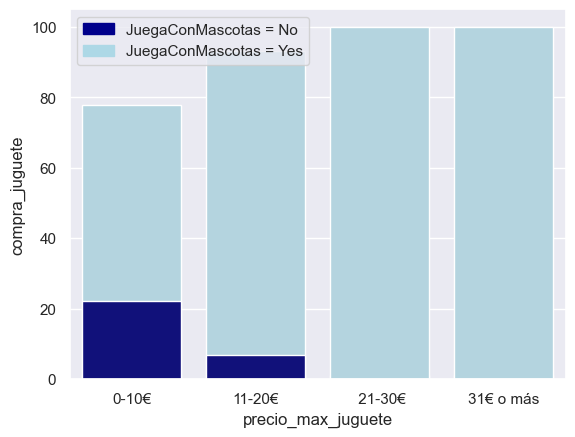

In [128]:

display(CompraJuegaConMascotas)
display(CompraNoJuegaConMascotas)


sns.countplot(data=CompraNoJuegaConMascotas, x="precio_max_juguete")
bar1 = sns.barplot(x="precio_max_juguete",  y="compra_juguete", data=CompraJuegaConMascotas, color='lightblue')
bar2 = sns.barplot(x="precio_max_juguete", y="compra_juguete", data=CompraNoJuegaConMascotas, color='darkblue')

add legendprint('Frecuencia de cada categoria:', (labels['factores_evaluar_calidad_juguetes'].value_counts()/labels['factores_evaluar_calidad_juguetes'].count())*100)
top_bar = mpatches.Patch(color='darkblue', label='JuegaConMascotas = No')
bottom_bar = mpatches.Patch(color='lightblue', label='JuegaConMascotas = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()